# Simple example

This is an example of using [fem](http://lbm.niddk.nih.gov/mckennajp/fem).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fem

In [2]:
n, m, degs = 25, 3, [1]
par = fem.simulate.simulated_parameters(n, m, degs)
data = fem.simulate.simulated_data(par, n, m, o=1.0)

In [3]:
x, y = data[:, :-1], data[:, 1:]
par_fit, disc = fem.fit.fit(x, y, degs)

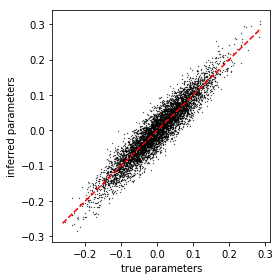

In [4]:
par_flat = np.hstack([p for p in par.itervalues()]).flatten()
par_fit_flat = np.hstack([p for p in par_fit.itervalues()]).flatten()

fig = plt.figure(figsize=(4,4))
ax = plt.gca()
ax.scatter(par_flat, par_fit_flat, c='k', s=0.1)
lo, hi = par_flat.min(), par_flat.max()
grid = np.linspace(lo, hi)
ax.plot(grid, grid, 'r--')
ax.set_xlabel('true parameters')
ax.set_ylabel('inferred parameters')
plt.tight_layout()
plt.show()

In [5]:
print fem.f90_fit.fit_module.fit.__doc__

par,disc,iter = fit(x,y,m_x,m_y,m_y_sum,degs,x_oh_pinv1,x_oh_pinv2,x_oh_pinv3,iters,overfit)

Wrapper for ``fit``.

Parameters
----------
x : input rank-2 array('i') with bounds (n_x,l)
y : input rank-2 array('i') with bounds (n_y,l)
m_x : input rank-1 array('i') with bounds (n_x)
m_y : input rank-1 array('i') with bounds (n_y)
m_y_sum : input int
degs : input rank-1 array('i') with bounds (n_deg)
x_oh_pinv1 : input rank-2 array('d') with bounds (l,x_oh_rank)
x_oh_pinv2 : input rank-1 array('d') with bounds (x_oh_rank)
x_oh_pinv3 : input rank-2 array('d') with bounds (x_oh_rank,n_s)
iters : input int
overfit : input int

Returns
-------
par : rank-2 array('d') with bounds (m_y_sum,n_s)
disc : rank-1 array('d') with bounds (n_y)
iter : rank-1 array('i') with bounds (n_y)

